# Prelude

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("dark_background")

# Observatory Performance Mode

In [2]:
opm = "glao"

# Telemetry

In [3]:
data = pd.read_parquet(f"{opm}-logs.parquet")

In [4]:
data.tail()

,WfeRms,SegmentWfeRms,SegmentPiston,ResidualWfeRms,SegmentResidualWfeRms,SegmentResidualPiston
4995,[1.2074478945578448e-06],"[8.515215768056805e-07, 7.659649554625503e-07,...","[7.899590173110482e-07, 7.02840338817623e-07, ...",[1.0661688065738417e-06],"[1.1760397455873317e-06, 8.628986165604147e-07...","[1.1021403452105005e-06, 1.5973059817042667e-0..."
4996,[1.2076734492438845e-06],"[8.510539828421315e-07, 7.646577842024271e-07,...","[7.903445862211811e-07, 7.029727271401498e-07,...",[1.0652778428266174e-06],"[1.1746909649446025e-06, 8.617380444775335e-07...","[1.1019545809176634e-06, 1.5949766520861886e-0..."
4997,[1.2078351119271247e-06],"[8.505215873810812e-07, 7.634624239472032e-07,...","[7.905340453362442e-07, 7.029396442703728e-07,...",[1.0645599104464054e-06],"[1.1737619161067414e-06, 8.606741630501347e-07...","[1.1018140639862395e-06, 1.5926947298794403e-0..."
4998,[1.2080105307177291e-06],"[8.496525651935372e-07, 7.622885505043087e-07,...","[7.908219004093553e-07, 7.030110964478808e-07,...",[1.0638567573550972e-06],"[1.172726456388773e-06, 8.598769909440307e-07,...","[1.1017236829502508e-06, 1.590668830431241e-06..."
4999,[1.2082182365702465e-06],"[8.49187472340418e-07, 7.612014201185957e-07, ...","[7.907651706773322e-07, 7.028291406641074e-07,...",[1.0631911209202372e-06],"[1.1716867902578088e-06, 8.590549782638845e-07...","[1.1017327778972685e-06, 1.5883334754107636e-0..."


# Last step wavefronts

In [5]:
wavefront = pd.read_parquet(f"{opm}-wavefront.parquet")
wavefront

,Wavefront,ReconWavefront,ResidualWavefront
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


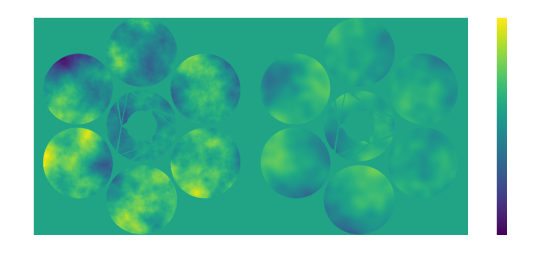

In [6]:
fig, ax = plt.subplots(figsize=(10,4))
h = ax.imshow(np.hstack([np.vstack(wavefront["Wavefront"])[-1].reshape(-1,512),\
                      -np.vstack(wavefront["ReconWavefront"])[-1].reshape(-1, 512)]))
fig.colorbar(h,ax=ax)

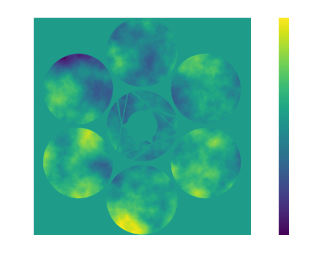

In [7]:
fig, ax = plt.subplots(figsize=(10,4))
h = ax.imshow(np.vstack(wavefront["Wavefront"])[-1].reshape(-1,512)
                      +np.vstack(wavefront["ReconWavefront"])[-1].reshape(-1, 512))
fig.colorbar(h,ax=ax)

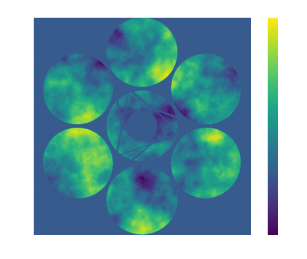

In [8]:
plt.imshow(np.vstack(wavefront["ResidualWavefront"])[-1].reshape(-1,512))
plt.colorbar()


# Wavefront RMS

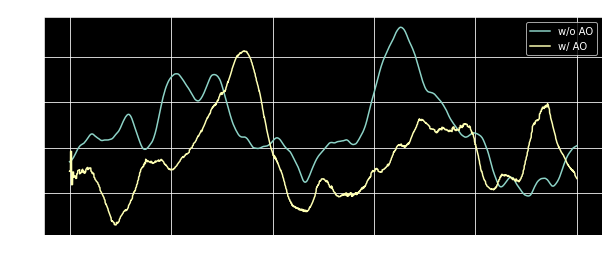

In [9]:
fig,ax = plt.subplots(figsize=(10,4))
ax.plot(np.vstack(data["WfeRms"]),label='w/o AO')
ax.plot(np.vstack(data["ResidualWfeRms"]), label='w/ AO')
ax.grid()
ax.set_xlabel("sample")
ax.set_ylabel("WFE RMS [m]")
ax.legend()


# Segment Wavefront RMS

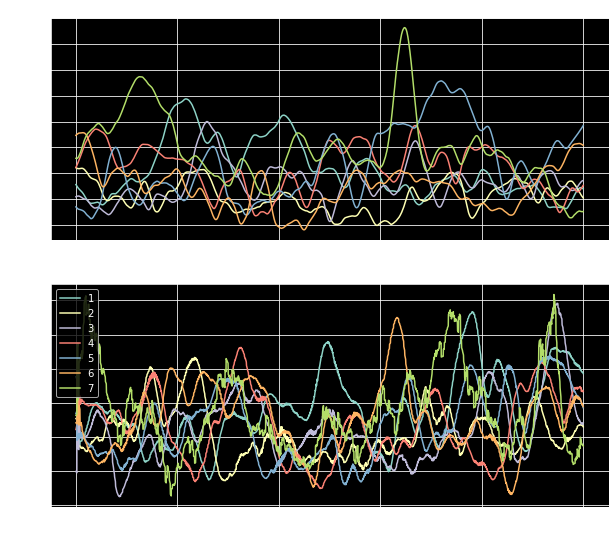

In [10]:
fig, axs = plt.subplots(nrows=2,sharex=True,figsize=(10, 9))
ax = axs[0]
ax.plot(np.vstack(data["SegmentWfeRms"]))
ax.grid()
ax.set_ylabel("Segment WFE RMS [m]")
ax = axs[1]
ax.plot(np.vstack(data["SegmentResidualWfeRms"]))
ax.grid()
ax.set_xlabel("sample")
ax.set_ylabel("Segment Residual WFE RMS [m]")
ax.legend(range(1, 8))


# Segment Piston

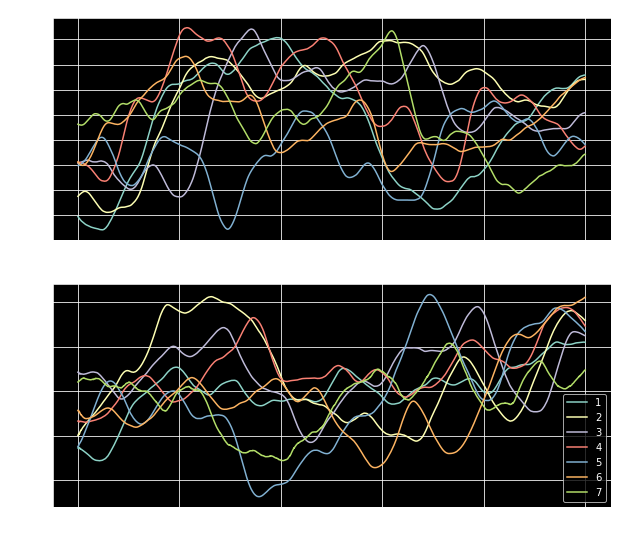

In [11]:
fig, axs = plt.subplots(nrows=2,sharex=True,figsize=(10, 9))
ax = axs[0]
ax.plot(np.vstack(data["SegmentPiston"]))
ax.set_ylabel("Segment Piston [m]")
ax.grid()
ax = axs[1]
ax.plot(np.vstack(data["SegmentResidualPiston"]))
ax.grid()
ax.set_xlabel("sample")
ax.set_ylabel("Segment Residual Piston [m]")
ax.legend(range(1, 8))


# Images

In [12]:
frame = pd.read_parquet(f"{opm}-frame.parquet")
frame

,NaturalSeeingImage,NaturalSeeingPSSnFwhm,DiffractionLimitedImage,GlaoPSSnFwhm
0,"[3854793200.0, 3913867300.0, 4230581500.0, 459...","[1.0572651624679565, 2.4570809265858535e-06]","[4042115800.0, 4089932800.0, 4058174200.0, 404...","[1.1332474946975708, 2.373079966566278e-06]"


In [13]:
frame['GlaoPSSnFwhm'][0][0]/frame["NaturalSeeingPSSnFwhm"][0][0]


1.07186686455482

## Natural Seeing image

(-0.5, 0.5)

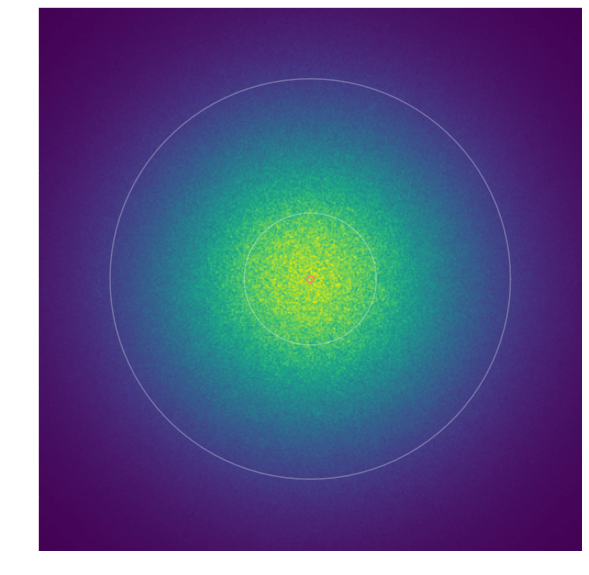

In [14]:
fig,ax = plt.subplots(figsize=(10,10))
px_scale = (180*3600/np.pi) * 0.5*0.5e-6/25.5
h = px_scale * 511/2
o = np.linspace(0, 2*np.pi, 101)
x, y = np.cos(o), np.sin(o)
ax.imshow(np.vstack(frame['NaturalSeeingImage']).reshape(512, -1),extent = [-h, h, -h, h])
r = px_scale * 25.5/8.365
ax.plot(x*r, y*r, 'C3')
r = px_scale * 60
ax.plot(x*r, y*r, 'w', alpha=0.25)
r = px_scale * 25.5/14E-2
ax.plot(x*r, y*r, 'w', alpha=0.25)
lim = np.asarray([-1, 1])*0.5
ax.set_xlim(lim)
ax.set_ylim(lim)


# Adaptive Optics image

In [15]:
np.vstack(frame["NaturalSeeingPSSnFwhm"])[0,1]*(180*3600e3/np.pi),\
np.vstack(frame["GlaoPSSnFwhm"])[0,1]*(180*3600e3/np.pi),\
    (180e3*3600/np.pi)*550e-9/8.365,(180e3*3600/np.pi)*550e-9/14e-2

(506.80932125566704, 489.4828795126593, 13.561941833341661, 810.3260245421643)

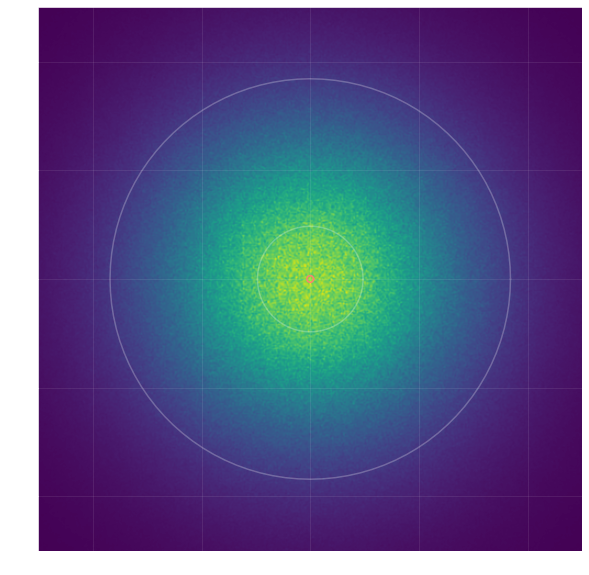

In [16]:
px_scale = (180*3600/np.pi) * 0.5*0.5e-6/25.5
h = px_scale * 511/2
o = np.linspace(0, 2*np.pi, 101)
x, y = np.cos(o), np.sin(o)
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(np.vstack(frame['DiffractionLimitedImage']).reshape(512, -1),
          extent=[-h, h, -h, h])
r = px_scale * 25.5/8.365
ax.plot(x*r, y*r, 'C3')
r = px_scale * 48
ax.plot(x*r, y*r, 'w', alpha=0.25)
r = px_scale * 25.5/14E-2
ax.plot(x*r, y*r, 'w', alpha=0.25)
lim = np.asarray([-1, 1])*0.5
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.grid(alpha=0.1)


In [17]:
0.5e-6/(0.25/(180*3600/np.pi))


0.4125296124941927

In [18]:
25.5/60

0.425